In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv("AG_DB_Cleaned_V2.csv")
print(data.columns)
data.shape

Index(['Unnamed: 0', 'index', 'source', 'url', 'title', 'image', 'category',
       'description', 'rank', 'pubdate', 'sentiment_polarity'],
      dtype='object')


(847877, 11)

In [18]:
# Remove first column with numbers
data = data.drop(columns=['Unnamed: 0'])

# Drop rows where 'pubdate' is missing
data = data.dropna(subset=['pubdate', 'title'])

# Transform 'pubdate' column into YYYY-MM-DD format
data['pubdate'] = pd.to_datetime(data['pubdate']).dt.strftime('%Y-%m-%d')

data.shape

(847876, 10)

In [31]:
title_freq_table = data['title'].value_counts()
title_freq_df = title_freq_table.reset_index()

# Rename the columns for clarity
title_freq_df.columns = ['title', 'frequency']
filtered_title_freq_df = title_freq_df[title_freq_df['frequency'] > 5]

In [32]:
filtered_title_freq_df

,title,frequency
0,NATION IN BRIEF,272
1,WORLD IN BRIEF,247
2,Reporters on the Job,200
3,The Nation's Weather \\n (AP)\\n,158
4,Weather around the U.S.A. \\n (AP)\\n,136
...,...,...
5395,Petrolio chiude in rialzo al Nymex,6
5396,Borsa Milano: avvio in rialzo,6
5397,Movie Guide,6
5398,Striking writers union reaches deal with Lette...,6


- Many titles are represented very often
- Could be a problem if we don't take the description into consideration
- Also titles are in different languages (row 5395, 5395 is in italian for example)
- Maybe remove all duplicates (?)

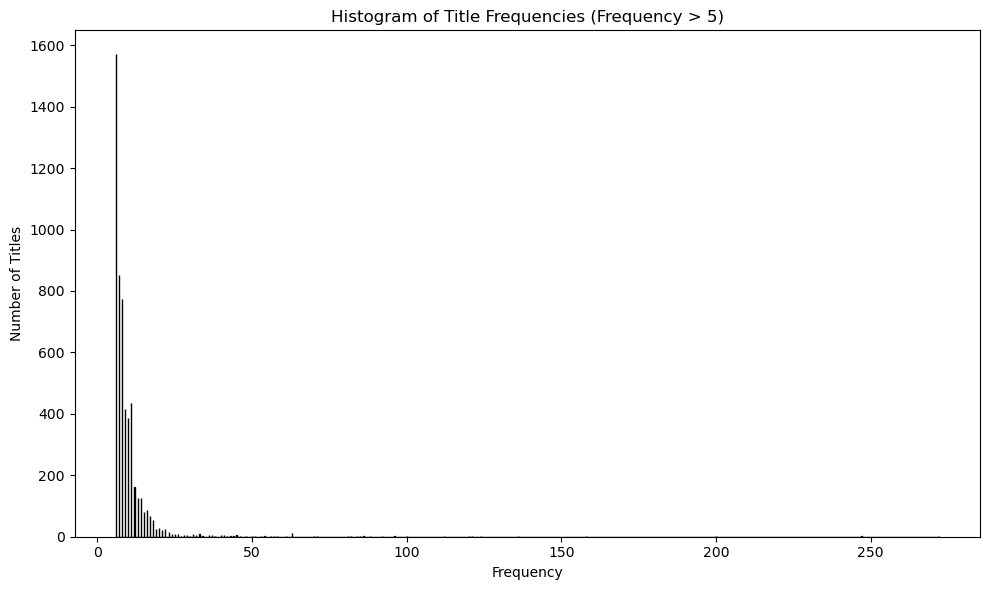

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_title_freq_df['frequency'], bins=5400, edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Number of Titles')
plt.title('Histogram of Title Frequencies (Frequency > 5)')
plt.tight_layout()
plt.show()

In [34]:
img_freq_table = data['image'].value_counts()
img_freq_df = img_freq_table.reset_index()

# Rename the columns for clarity
img_freq_df.columns = ['image', 'frequency']
img_freq_df

,image,frequency
0,Yes,463100
1,No,384776


- I made a discovery with the AG_DB_Cleaned_V1.csv data, which isn't possible with this data anymore but I sent you a screenshot
- Many images of articles are probably logos or similar stuff (wasn't able to look at the images in detail) because there are also many images which appear more often (as often as 3200 time!)
- These images give probably no information to an article, what would you do with them?

In [37]:
# Create a new column 'no of chr' with the number of characters in 'description'
data['no of chr'] = data['description'].str.len()

In [38]:
quantiles = data['no of chr'].quantile([0, 0.25, 0.5, 0.75, 1.0])

# Calculate max and min
max_value = data['no of chr'].max()
min_value = data['no of chr'].min()

# Print the results
print("Quantiles:")
print(quantiles)
print("\nMax Value:", max_value)
print("Min Value:", min_value)

Quantiles:
0.00        1.0
0.25      111.0
0.50      192.0
0.75      265.0
1.00    34967.0
Name: no of chr, dtype: float64

Max Value: 34967.0
Min Value: 1.0


In [39]:
chr_freq_table = data['no of chr'].value_counts()
chr_freq_df = chr_freq_table.reset_index()

# Rename the columns for clarity
chr_freq_df.columns = ['no of chr', 'frequency']
chr_freq_df

,no of chr,frequency
0,103.0,34910
1,104.0,9438
2,102.0,5715
3,60.0,5603
4,105.0,5554
...,...,...
4592,5797.0,1
4593,4695.0,1
4594,3951.0,1
4595,2573.0,1


- Weird amount of articles with 102, 103, 104, 105 characters in description
- Also articles with very few characters
  

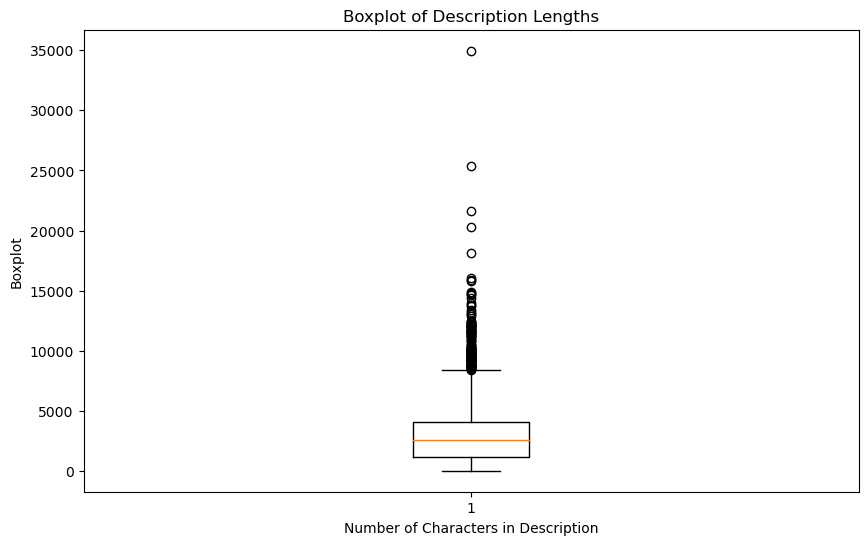

In [43]:
plt.figure(figsize=(10, 6))
plt.boxplot(chr_freq_df['no of chr'])
plt.xlabel('Number of Characters in Description')
plt.ylabel('Boxplot')
plt.title('Boxplot of Description Lengths')
plt.show()

- Anything above approx. 10000 characters should probably be removed (if not even lower boundary)

In [47]:
chr_freq_df[chr_freq_df['no of chr'] < 10]

,no of chr,frequency
852,7.0,128
1186,2.0,65
1214,8.0,43
1354,9.0,19
1358,1.0,19
1408,3.0,11
1432,5.0,9
1465,6.0,6
1493,4.0,5


In [49]:
data_chr = data
data_chr['no of chr'] = data['description'].str.len()

In [51]:
data_chr[data_chr['no of chr'] < 10]

,index,source,url,title,image,category,description,rank,pubdate,sentiment_polarity,no of chr
609,1198,BBC News health,http://news.bbc.co.uk/go/click/rss/0.91/public...,Cancer: The facts,No,Health,d,5,2004-08-19,0.0,1.0
3031,6394,Yahoo Politics,http://us.rd.yahoo.com/dailynews/rss/politics/...,AP Top Political News At 5:44 p.m. EDT\\n ...,No,World,AP,5,2004-08-19,0.0,5.0
3225,6698,San Diego Union Tribune,http://www.signonsandiego.com/news/nation/terr...,"British police charge eight, including key al-...",Yes,Top Stories,,5,2004-08-19,0.0,3.0
3229,6702,San Diego Union Tribune,http://www.signonsandiego.com/news/nation/terr...,"British police charge eight, including key al-...",Yes,World,,5,2004-08-19,0.0,3.0
42686,142282,The Register,http://go.theregister.com/feed/2004/12/06/ibm_...,IBM wins Â£500m Lloyds TSB VoIP gig,Yes,Sci/Tech,Big deal,5,2004-12-06,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
843610,1238687,New York Times Movies,http://www.nytimes.com/2008/02/15/movies/15mov...,Movie Guide and Film Series,No,Entertainment,MOVIES,5,2008-02-19,0.0,7.0
846056,1241133,The Washington Post sports,http://www.washingtonpost.com/wp-dyn/content/a...,Sport-By-Sport Notes,No,Sports,,4,2008-02-20,0.0,2.0
846057,1241134,The Washington Post sports,http://www.washingtonpost.com/wp-dyn/content/a...,Countdown to Beijing,No,Sports,,4,2008-02-20,0.0,2.0
846446,1241523,New York Times Movies,http://www.nytimes.com/2008/02/15/movies/15mov...,Movie Guide and Film Series,No,Entertainment,MOVIES,5,2008-02-20,0.0,7.0


- Descriptions are VERY uninformative or even empty
- Have to be removed can't be compared to other articles at all
- Weird articles: For example: 
  - 846690	1241767	Rediff Movies	http://www.rediff.com/rss/redirect.php?url=htt...	**Who's the hottest star on TV?**	No	Entertainment	**Tell us**
- I'm not sure how to handle this, maybe a lower eliminate all articles with number of characters below 100? Thoughts?

In [61]:
data_chr['description'][data_chr['no of chr'] == 103]

239       Google and Yahoo announced today that they hav...
305       A Memphis apartment lived in by a teenage Elvi...
1079      Acclaimed Kenyan author Ngugi wa Thiong o tell...
1218      Italy and the Netherlands are the latest count...
1357      American Natalie Coughlin wins the gold medal ...
                                ...                        
847836    Non  egrave  un Rosenborg dimesso quello che g...
847837    La Sampdoria ha ripreso gli allenamenti in vis...
847838    Doppio allenamento per il Napoli in vista dell...
847839    Il  caso Marchini  viene archiviato per insuff...
847840    Test infrasettimanale per il Modena  che ha sv...
Name: description, Length: 34910, dtype: object

- I checked on the descriptions with 103 characters since there are 35000 of them. They seem alright, maybe just a default number for a description


- Again: We need to choose a type of articles, if we want to use the descriptions since they are probably not comparable at all, the range is way to big in my opinion (Not sure how to handle it though)



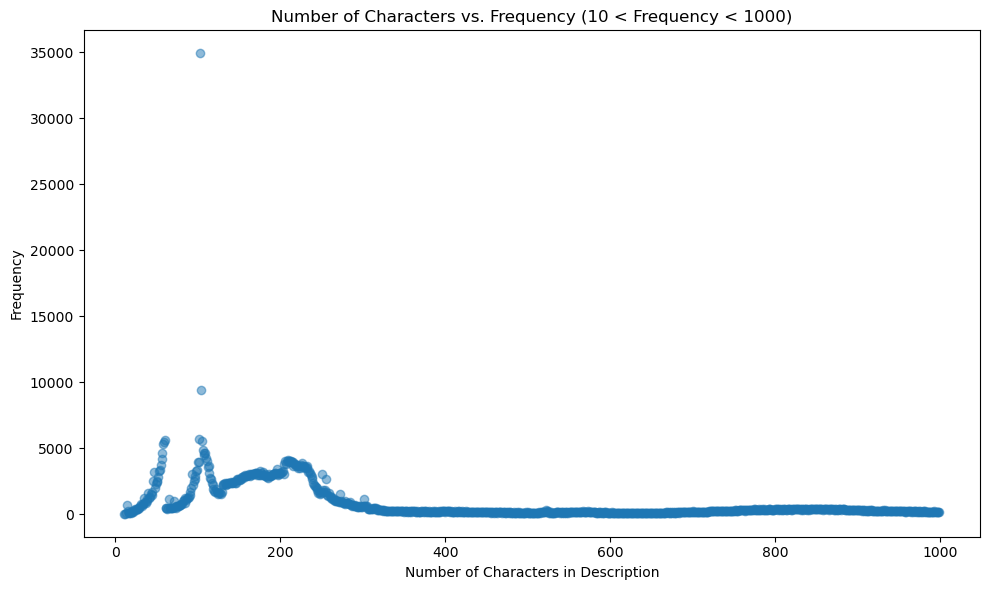

In [77]:
# Group by 'no of chr' and count the frequency for each number of characters
character_frequency = data.groupby('no of chr').size().reset_index(name='frequency')

bool = (character_frequency['no of chr'] > 10) & (character_frequency['no of chr'] < 1000)

# Plot the number of characters against their frequency
plt.figure(figsize=(10, 6))
plt.scatter(character_frequency['no of chr'][bool], character_frequency['frequency'][bool], marker='o', alpha=0.5)
plt.xlabel('Number of Characters in Description')
plt.ylabel('Frequency')
plt.title('Number of Characters vs. Frequency (10 < Frequency < 1000)')
plt.tight_layout()
plt.show()

- Maybe just use articles with less than 200-300 characters (?)
- I'm just trying to find something useful because the data seems very dirty :) and it has way to many rows in my opinion

In [56]:
import numpy as np

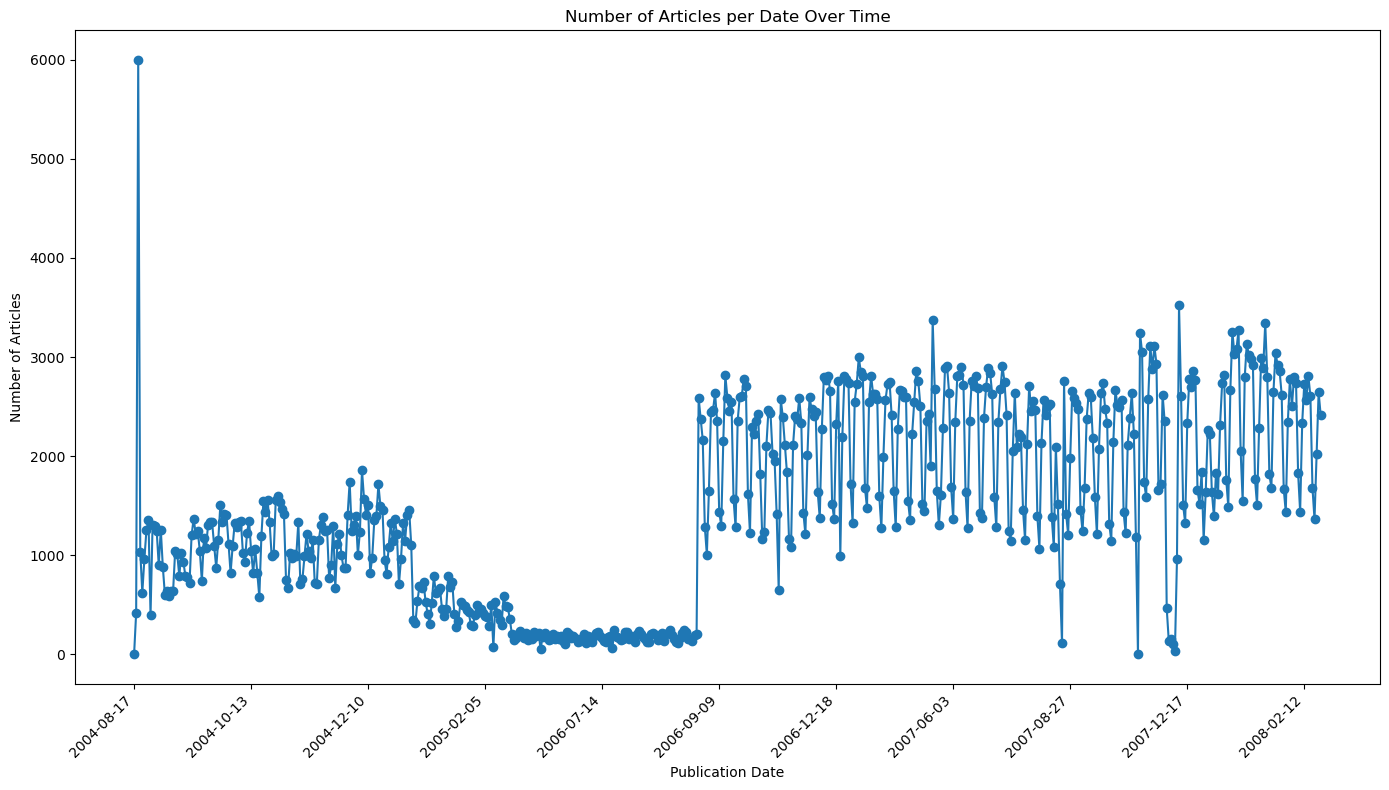

In [58]:
articles_per_date = data.groupby('pubdate').size().reset_index(name='count')

# Plot the number of articles per date over time
plt.figure(figsize=(14, 8))
plt.plot(articles_per_date['pubdate'], articles_per_date['count'], marker='o')
plt.xlabel('Publication Date')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Date Over Time')

# Set x-axis ticks at regular intervals
tick_interval = int(len(articles_per_date) / 10)  # Adjust the interval as needed
plt.xticks(np.arange(0, len(articles_per_date), tick_interval), rotation=45, ha='right')

plt.tight_layout()
plt.show()

- I'm not sure if I didn't look search well enough or if its written somewhere but the pubdate column probably doesn't contain the release date for the articles, but the date on which the articles were uploaded to the database (?)
  - (maybe it was obvious for you but I didn't realize it til now haha, and tell me if I'm wrong)
- So we should take also a specific time interval for articles given the change in number of articles uploaded to achieve a more homogeneus dataset: For example all articles after September 2006

## All in all I think that we should massively reduce the number of observations given that they are soooo different from each other and soooo many.